<a href="https://colab.research.google.com/github/Lis30/Homeworks/blob/main/%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B0_4_2a_%D0%9A%D0%B0%D1%80%D0%BF%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os
import zipfile

На этот раз данные имеют следующую структуру:<br>
- записываются для каждого пользователя, совершившего покупки, каждый день<br>
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя<br>
- внутри каждой папки есть файл data.csv, где и хранятся данные<br>
<br>
Схематично выглядит так:<br>
<br>
└── data<br>
...├── 2020-12-30<br>
......│  ├── FirstName_LastName1<br>
.........│  │   └── data.csv<br>
............│  ├── FirstName_LastName2<br>
...............│  │   └── data.csv<br>
..................│  └── FirstName_LastName3<br>
.....................│      └── data.csv<br>
........................└── 2020-12-31<br>
..............................├── FirstName_LastName1<br>
....................................│   └── data.csv<br>
..........................................└── FirstName_LastName5<br>
................................................└── data.csv<br>
<br>
Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.<br>
Note: данные в задании покрывают другой временной период, имена тоже другие.

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [3]:
# Путь к архиву
zip_file = 'data.zip'

# Папка для распаковки архива
extract_folder = 'extracted_data'

# Создаем папку для распаковки архива, если она не существует
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Распаковываем архив
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [11]:
path = '/content/extracted_data/data' #путь к папке с файлами

all_data = pd.DataFrame() #пустая таблица, куда будем складывать все данные

for path, dirs, files in os.walk(path): #прошлись по всем папкам
    for file in files:
        data_path = f'{path}/{file}' #задали путь до конечного файла
        splited_path = path.split('/') #разбили путь до файла на составляющие, чтобы вытащить дату и имя
        name = splited_path[-1]
        date = splited_path[-2]
        df_temp = pd.read_csv(data_path)  #сначала прочитали файл, потом добавили 2 колонки
        df_temp['date'] = date #записываем дату и имя в соответствующие колонки
        df_temp['name'] = name

        all_data = pd.concat((all_data, df_temp)) #объединили все таблички в одну

In [13]:
all_data.head(5)

,Unnamed: 0,product_id,quantity,date,name
0,0,20,3,2020-12-07,Alexey_Smirnov
1,1,7,1,2020-12-07,Alexey_Smirnov
0,0,50,5,2020-12-07,Petr_Smirnov
1,1,16,5,2020-12-07,Petr_Smirnov
2,2,34,2,2020-12-07,Petr_Smirnov


In [ ]:
all_data.date = all_data.date.astype('datetime64[ns]')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        161 non-null    datetime64[ns]
 1   name        161 non-null    object        
 2   product_id  161 non-null    int64         
 3   quantity    161 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.2+ KB


Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [ ]:
all_data.groupby('name').quantity.sum().sort_values(ascending=False).head(2)

name
Alexey Smirnov    52
Petr Smirnov      52
Name: quantity, dtype: int64

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [ ]:
for_graph = all_data.groupby('product_id').quantity.sum().sort_values(ascending=False).head(10)

<Axes: xlabel='product_id'>

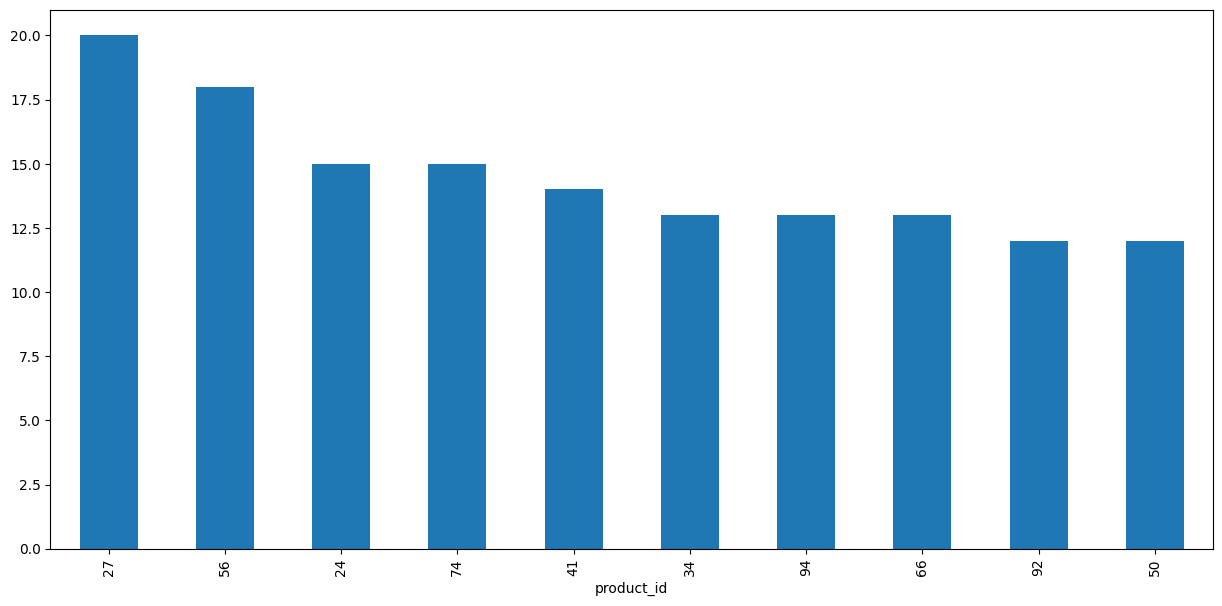

In [ ]:
for_graph.plot(kind='bar',figsize=(15,7))

In [ ]:
print(f'Было продано {all_data.query("product_id == 56").quantity.sum()} единиц товара с product_id==56')

Было продано 18 единиц товара с product_id==56


Визуализируйте продажи по дням.

<Axes: xlabel='date'>

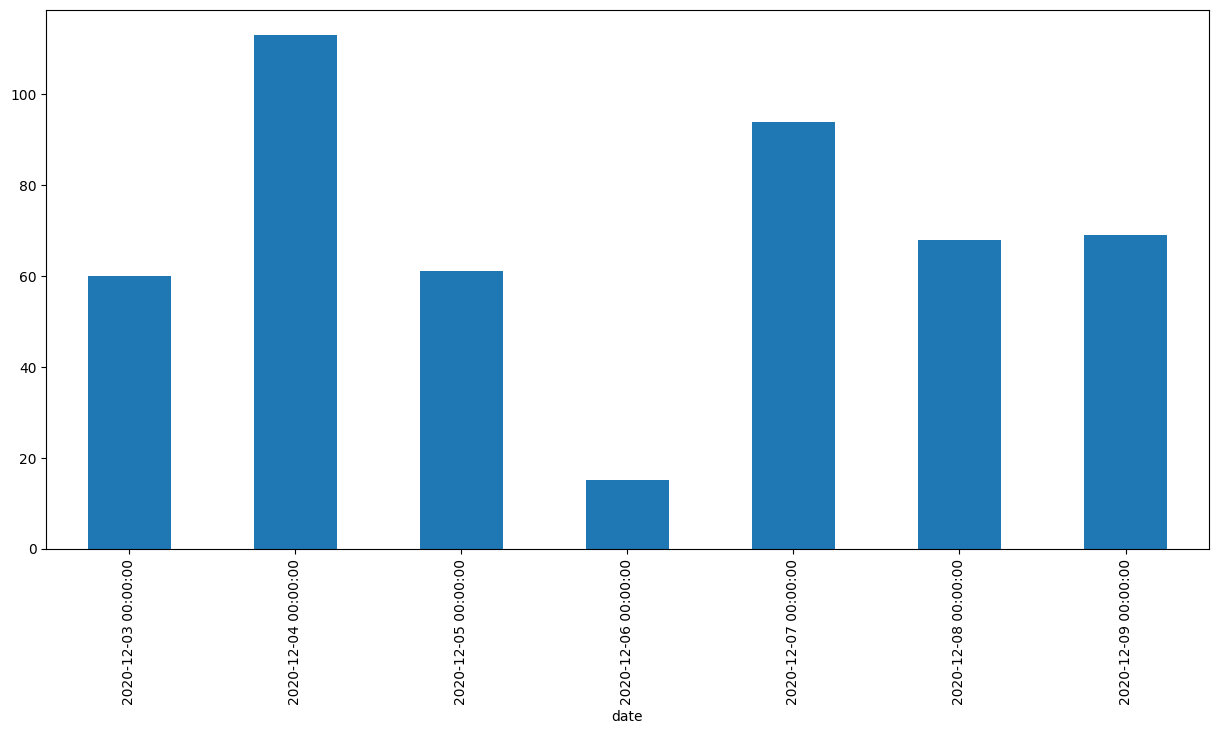

In [ ]:
all_data.groupby('date').quantity.sum().plot(kind='bar',figsize=(15,7))

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [ ]:
all_data.groupby(['name', 'product_id']).agg({'date': pd.Series.nunique}).query('date > 1')

,,date
name,product_id,
Anton Ivanov,15,2
Petr Fedorov,94,2
